In [0]:
#@title
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [0]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_prob):
    ejex, ejey, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(ejex, ejey)

    plt.figure()
    plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])

    plt.xlabel('FPR (1-ESP)')
    plt.ylabel('SEN')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
def plot_scores(confusion_matrix, title = ''):
    accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[0,1] + confusion_matrix[1,0])
    precision = (confusion_matrix[1,1]) / (confusion_matrix[1,1] + confusion_matrix[0,1])
    recall = (confusion_matrix[1,1]) / (confusion_matrix[1,1] + confusion_matrix[1,0])
    esp = (confusion_matrix[0,0] ) / (confusion_matrix[0,0] + confusion_matrix[0,1])
    f1 = (2*precision*recall)/(precision + recall)
    x = np.array([accuracy, precision, recall, esp, f1])
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(np.arange(0,x.size,1), x, tick_label=['Accuracy', 'Precision', 'Recall', 'Esp', 'F1'])
    ax.grid(color='g', linestyle=':')
    ax.set_ylim([-0.05, 1.05])
    ax.set_title(title)
    
  
    labels = [x[i] for i in range(len(rects1))]

    for rect, label in zip(rects1, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{:.3f}'.format(label),
                ha='center', va='bottom')

   
    plt.show()
    x


In [0]:
from google.colab import files
#files.upload()

In [0]:
diabetes_test = pd.read_csv("./test.csv", sep=",")
print(diabetes_test.shape)
diabetes_test.head()

(20346, 49)


,kaggle_id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,diabetic
0,0,104256924,131774687,Caucasian,Female,[40-50),?,1,1,6,...,No,No,No,No,No,No,No,No,>30,?
1,1,399628730,188711126,Hispanic,Female,[20-30),?,3,1,1,...,No,No,No,No,No,No,No,No,NO,?
2,2,327902828,172969584,Caucasian,Female,[70-80),?,3,3,1,...,No,No,No,No,No,No,No,No,NO,?
3,3,182782572,51369747,AfricanAmerican,Female,[50-60),?,1,1,7,...,No,No,No,No,No,No,No,No,>30,?
4,4,35754,7022035,Caucasian,Male,[50-60),?,2,1,2,...,No,No,No,No,No,No,No,No,>30,?


In [0]:
diabetes_train = pd.read_csv("./train.csv", sep=",")

print(diabetes_train.shape)


(81384, 49)


In [0]:
import pandas as pd
diabetes_train.count()
diabetes_dataset = pd.concat([diabetes_train,diabetes_test])

In [0]:
diabetes_dataset.shape
diabetes_dataset.iloc[81385]

A1Cresult                                      None
Unnamed: 0                                      NaN
acarbose                                         No
acetohexamide                                    No
admission_source_id                               1
admission_type_id                                 3
age                                         [20-30)
chlorpropamide                                   No
citoglipton                                      No
diabetic                                          ?
diag_1                                          659
diag_2                                          648
diag_3                                          661
discharge_disposition_id                          1
encounter_id                              399628730
examide                                          No
gender                                       Female
glimepiride                                      No
glimepiride-pioglitazone                         No
glipizide   

In [0]:
for col_name in diabetes_dataset.columns.values:
    print(col_name)
    print(diabetes_dataset[col_name].unique())

A1Cresult
['>7' 'None' 'Norm' '>8']
Unnamed: 0
[0.0000e+00 1.0000e+00 2.0000e+00 ... 8.1382e+04 8.1383e+04        nan]
acarbose
['No' 'Steady' 'Down' 'Up']
acetohexamide
['No' 'Steady']
admission_source_id
[ 7 17  4  1  6  5  2  3 10  9 20  8 22 25 11 14 13]
admission_type_id
[2 6 3 5 1 8 7 4]
age
['[50-60)' '[40-50)' '[70-80)' '[80-90)' '[60-70)' '[30-40)' '[0-10)'
 '[20-30)' '[10-20)' '[90-100)']
chlorpropamide
['No' 'Up' 'Steady' 'Down']
citoglipton
['No']
diabetic
['Yes' 'No' '?']
diag_1
['250.6' '250.4' '414' '296' '715' '574' '433' '722' '578' '592' '558'
 '428' '458' '799' '38' '185' '493' '682' '560' '781' '786' '295' '457'
 'V54' '434' '562' '250.8' '250.11' '193' '575' '577' '491' '227' '780'
 '507' '211' '426' '564' '427' '398' '430' '276' '411' '486' '515' '820'
 '261' '404' '250.03' '537' '197' 'V58' '998' '410' '891' '922' '536'
 '278' '789' '997' '535' 'V57' '965' '518' '250.13' '88' '593' '822' '540'
 '935' '996' '808' '153' '584' '599' '250.7' '436' '388' '440' '557' '

In [0]:
diabetes_dataset = diabetes_dataset.drop(['encounter_id', 'patient_nbr'], axis=1)


In [0]:
diabetes_dataset.loc[diabetes_dataset['race']=='?', 'race']='Other'


In [0]:
diabetes_dataset['gender'].value_counts()

Female             54693
Male               47034
Unknown/Invalid        3
Name: gender, dtype: int64

In [0]:
diabetes_dataset.loc[diabetes_dataset['gender']=='Unknown/Invalid', 'gender'] = 'Female'
diabetes_dataset['gender'].value_counts()

Female    54696
Male      47034
Name: gender, dtype: int64

In [0]:
ages_groups = {'[50-60)':5, '[40-50)':4, '[70-80)':7, '[80-90)':8, '[60-70)':6, '[30-40)':3, '[0-10)':0, '[20-30)':2, '[10-20)':1, '[90-100)':9}
diabetes_dataset['age'] = diabetes_dataset['age'].apply(lambda x: ages_groups[x])
diabetes_dataset['age'].head()

0    5
1    4
2    7
3    8
4    7
Name: age, dtype: int64

In [0]:
diabetes_dataset['weight'].value_counts()

?            98533
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [0]:
diabetes_dataset['weight'].unique()

array(['?', '[75-100)', '[125-150)', '[50-75)', '[100-125)', '[25-50)',
       '[0-25)', '[150-175)', '[175-200)', '>200'], dtype=object)

Eliminamos la columna *weight* porque la la mayoría de los valores son desconocidos

In [0]:
ages_groups = {'?':0, '[75-100)':13, '[125-150)':15, '[50-75)':12, '[100-125)':14, '[25-50)':11,
       '[0-25)':10, '[150-175)':16, '[175-200)':17, '>200':18}
diabetes_dataset['weight'] = diabetes_dataset['weight'].apply(lambda x: ages_groups[x])
diabetes_dataset['weight'].head()

0    0
1    0
2    0
3    0
4    0
Name: weight, dtype: int64

In [0]:
diabetes_dataset['payer_code'].value_counts()

?     40241
MC    32431
HM     6273
SP     5006
BC     4652
MD     3528
CP     2532
UN     2448
CM     1935
OG     1032
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [0]:
diabetes_dataset.loc[diabetes_dataset['payer_code']=='?', 'payer_code'] = 'Unknown'
diabetes_dataset['payer_code'].value_counts()

Unknown    40241
MC         32431
HM          6273
SP          5006
BC          4652
MD          3528
CP          2532
UN          2448
CM          1935
OG          1032
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: payer_code, dtype: int64

In [0]:
diabetes_dataset.loc[diabetes_dataset['medical_specialty']=='?', 'medical_specialty'] = 'Unknown'
medical_specialty_aux = diabetes_dataset['medical_specialty'].value_counts().to_frame()
values = medical_specialty_aux[medical_specialty_aux['medical_specialty']<100].index.values

diabetes_dataset.loc[diabetes_dataset['medical_specialty'].isin(values) , 'medical_specialty'] = 'Unknown'
diabetes_dataset['medical_specialty'].value_counts()

Unknown                              50854
InternalMedicine                     14630
Emergency/Trauma                      7564
Family/GeneralPractice                7438
Cardiology                            5349
Surgery-General                       3098
Nephrology                            1612
Orthopedics                           1400
Orthopedics-Reconstructive            1232
Radiologist                           1140
Pulmonology                            870
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                670
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [0]:
diabetes_dataset.loc[diabetes_dataset['diag_1']=='?', 'diag_1'] = 'Unknown'
medical_specialty_aux = diabetes_dataset['diag_1'].value_counts().to_frame()
values = medical_specialty_aux[medical_specialty_aux['diag_1']<100].index.values

diabetes_dataset.loc[diabetes_train['diag_1'].isin(values) , 'diag_1'] = 'Unknown'
diabetes_dataset['diag_1'].value_counts()

Unknown    10825
428         6695
414         6458
786         3927
410         3536
486         3429
427         2712
491         2223
715         2106
682         1987
780         1982
434         1972
996         1925
276         1844
38          1648
250.8       1646
599         1556
584         1481
V57         1175
250.6       1165
518         1091
820         1050
577         1038
493         1024
435         1000
562          965
574          942
296          883
560          860
250.7        846
           ...  
796            1
759            1
917            1
816            1
448            1
671            1
704            1
237            1
230            1
594            1
602            1
250.93         1
955            1
735            1
952            1
731            1
958            1
992            1
990            1
306            1
936            1
603            1
934            1
301            1
991            1
551            1
967            1
964           

In [0]:
diabetes_dataset.loc[diabetes_dataset['diag_2']=='?', 'diag_2'] = 'Unknown'
medical_specialty_aux = diabetes_dataset['diag_2'].value_counts().to_frame()
values = medical_specialty_aux[medical_specialty_aux['diag_2']<100].index.values

diabetes_dataset.loc[diabetes_dataset['diag_2'].isin(values) , 'diag_2'] = 'Unknown'
diabetes_dataset['diag_2'].value_counts()

Unknown    10106
276         6749
428         6660
250         6068
427         5035
401         3736
496         3304
599         3288
403         2822
414         2646
411         2565
250.02      2074
707         1999
585         1869
584         1648
491         1544
250.01      1523
285         1520
780         1491
425         1434
682         1433
486         1379
518         1354
424         1070
413         1042
250.6        894
493          881
305          702
786          644
280          606
           ...  
562          142
348          140
722          139
590          134
V43          130
728          130
250.7        130
V15          128
781          123
593          122
715          122
340          119
286          117
204          117
135          115
995          114
E878         113
E885         112
E888         109
558          108
331          108
466          107
153          107
415          107
482          106
444          106
250.13       104
250.42       1

In [0]:
diabetes_dataset.loc[diabetes_dataset['diag_3']=='?', 'diag_3'] = 'Unknown'
medical_specialty_aux = diabetes_dataset['diag_3'].value_counts().to_frame()
values = medical_specialty_aux[medical_specialty_aux['diag_3']<100].index.values

diabetes_dataset.loc[diabetes_dataset['diag_3'].isin(values) , 'diag_3'] = 'Unknown'
diabetes_dataset['diag_3'].value_counts()

250        11549
Unknown    11286
401         8287
276         5172
428         4576
427         3954
414         3663
496         2602
403         2355
585         1992
272         1968
599         1941
V45         1388
250.02      1369
707         1359
780         1332
285         1200
425         1135
250.6       1080
424         1062
584          963
305          924
250.01       914
682          887
518          854
41           727
493          694
278          680
530          625
786          584
           ...  
250.7        141
591          140
284          137
574          136
250.03       134
781          133
466          132
E888         131
250.42       130
250.51       128
564          127
731          126
286          125
404          124
202          122
722          121
782          119
E885         117
250.82       113
288          113
250.5        111
794          110
710          109
558          108
728          107
648          107
569          107
196          1

In [0]:

glucose_groups = {'None':0, 'Norm':10, '>200':11, '>300':12}
diabetes_dataset['max_glu_serum'] = diabetes_dataset['max_glu_serum'].apply(lambda x: glucose_groups[x])
diabetes_dataset['max_glu_serum'].head()


0    0
1    0
2    0
3    0
4    0
Name: max_glu_serum, dtype: int64

In [0]:
diabetes_dataset['max_glu_serum'].value_counts()

0     96386
10     2597
11     1484
12     1263
Name: max_glu_serum, dtype: int64

In [0]:
diabetes_dataset['A1Cresult'].value_counts()

None    84716
>8       8215
Norm     4987
>7       3812
Name: A1Cresult, dtype: int64

In [0]:
glucose_groups = {'None':0, 'Norm':10, '>7':11, '>8':12}
diabetes_dataset['A1Cresult'] = diabetes_dataset['A1Cresult'].apply(lambda x: glucose_groups[x])
diabetes_dataset['A1Cresult'].head()

0    11
1     0
2     0
3    11
4     0
Name: A1Cresult, dtype: int64

In [0]:
 np.sort(diabetes_dataset.columns.values)

array(['A1Cresult', 'Unnamed: 0', 'acarbose', 'acetohexamide',
       'admission_source_id', 'admission_type_id', 'age',
       'chlorpropamide', 'citoglipton', 'diabetic', 'diag_1', 'diag_2',
       'diag_3', 'discharge_disposition_id', 'examide', 'gender',
       'glimepiride', 'glimepiride-pioglitazone', 'glipizide',
       'glipizide-metformin', 'glyburide', 'glyburide-metformin',
       'kaggle_id', 'max_glu_serum', 'medical_specialty', 'metformin',
       'metformin-pioglitazone', 'metformin-rosiglitazone', 'miglitol',
       'nateglinide', 'num_lab_procedures', 'num_medications',
       'num_procedures', 'number_diagnoses', 'number_emergency',
       'number_inpatient', 'number_outpatient', 'payer_code',
       'pioglitazone', 'race', 'readmitted', 'repaglinide',
       'rosiglitazone', 'time_in_hospital', 'tolazamide', 'tolbutamide',
       'troglitazone', 'weight'], dtype=object)

In [0]:
medicine_groups = {'No':0, 'Down':10, 'Steady':11, 'Up':12}
columns_medicine = ['acarbose', 'acetohexamide', 'chlorpropamide', 'citoglipton', 'examide', 'glimepiride', 'glimepiride-pioglitazone', 
           'glipizide', 'glipizide-metformin', 'glyburide', 'glyburide-metformin', 'metformin', 'metformin-pioglitazone', 'metformin-rosiglitazone', 
           'miglitol', 'nateglinide', 'pioglitazone', 'repaglinide', 'rosiglitazone', 'tolazamide',
           'tolbutamide', 'troglitazone']
for col_name in columns_medicine:
    diabetes_dataset[col_name] = diabetes_dataset[col_name].apply(lambda x: medicine_groups[x])
    

In [0]:
readmited_groups = {'NO':0, '<30':10, '>30':11}
diabetes_dataset['readmitted'] = diabetes_dataset['readmitted'].apply(lambda x: readmited_groups[x])
diabetes_dataset['readmitted'].head()

0     0
1    11
2    11
3    10
4     0
Name: readmitted, dtype: int64

In [0]:
diabetes_groups = {'Yes':1, 'No':0, '?':-1}
diabetes_dataset['diabetic'] = diabetes_dataset['diabetic'].apply(lambda x: diabetes_groups[x])
diabetes_dataset['diabetic'].head()

0    1
1    1
2    1
3    1
4    1
Name: diabetic, dtype: int64

In [0]:
diabetes_dataset['diabetic'].value_counts()


 1    62683
-1    20346
 0    18701
Name: diabetic, dtype: int64

In [0]:
gender_groups = {'Male':1, 'Female':0}
diabetes_dataset['gender'] = diabetes_dataset['gender'].apply(lambda x: gender_groups[x])
diabetes_dataset['gender'].head()

0    1
1    1
2    1
3    0
4    1
Name: gender, dtype: int64

In [0]:

categorical_variables = ['race',
                         'admission_type_id',
                         'discharge_disposition_id',
                         'admission_source_id',
                         'payer_code',
                         'medical_specialty',
                         'diag_1',
                         'diag_2',
                         'diag_3']
#Primero eliminamos los espacios antes y después de los valores

diabetes_dataset_tidy = pd.get_dummies(diabetes_dataset, columns = categorical_variables)

In [0]:
print(diabetes_dataset_tidy.shape)
diabetes_dataset_tidy.head()

(101730, 954)


,A1Cresult,Unnamed: 0,acarbose,acetohexamide,age,chlorpropamide,citoglipton,diabetic,examide,gender,...,diag_3_E885,diag_3_E888,diag_3_Unknown,diag_3_V10,diag_3_V12,diag_3_V15,diag_3_V42,diag_3_V43,diag_3_V45,diag_3_V58
0,11,0.0,0,0,5,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0,0,4,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,0,0,7,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,11,3.0,0,0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.0,0,0,7,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
diabetes_dataset_tidy = diabetes_dataset_tidy.drop(['Unnamed: 0'], axis=1)

In [0]:
diabetes_train_tidy = diabetes_dataset_tidy.iloc[0:81383,:]
diabetes_train_tidy = diabetes_train_tidy.drop('kaggle_id', axis=1)
diabetes_train_tidy.head()

,A1Cresult,acarbose,acetohexamide,age,chlorpropamide,citoglipton,diabetic,examide,gender,glimepiride,...,diag_3_E885,diag_3_E888,diag_3_Unknown,diag_3_V10,diag_3_V12,diag_3_V15,diag_3_V42,diag_3_V43,diag_3_V45,diag_3_V58
0,11,0,0,5,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,7,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,7,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
diabetes_test_tidy = diabetes_dataset_tidy.iloc[81384:,:]

diabetes_test_tidy.count()


A1Cresult                   20346
acarbose                    20346
acetohexamide               20346
age                         20346
chlorpropamide              20346
citoglipton                 20346
diabetic                    20346
examide                     20346
gender                      20346
glimepiride                 20346
glimepiride-pioglitazone    20346
glipizide                   20346
glipizide-metformin         20346
glyburide                   20346
glyburide-metformin         20346
kaggle_id                   20346
max_glu_serum               20346
metformin                   20346
metformin-pioglitazone      20346
metformin-rosiglitazone     20346
miglitol                    20346
nateglinide                 20346
num_lab_procedures          20346
num_medications             20346
num_procedures              20346
number_diagnoses            20346
number_emergency            20346
number_inpatient            20346
number_outpatient           20346
pioglitazone  

## Exploración de datos

## Preparación de los datos

### División train/test

In [0]:
from sklearn.model_selection import train_test_split

# Paso 1: Preparamos los datos
features = diabetes_train_tidy.columns.drop(['diabetic'])
X = diabetes_train_tidy[features].values

y = diabetes_train_tidy['diabetic'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Test_dataset_X = diabetes_test_tidy[features].values


print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)
print('Datos test dataset Kaggle:  ', Test_dataset_X.shape)
print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

('Datos train: ', (56968, 951))
('Datos test:  ', (24415, 951))
('Datos test dataset Kaggle:  ', (20346, 951))
Propocion train:0.771
Propocion test: 0.768


### Normalización

In [0]:
from sklearn.preprocessing import StandardScaler

# Paso 1.1: Preprocesar las variables
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

Test_dataset_X_norm = scaler.transform(Test_dataset_X)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Procesar los algoritmos

Ahora que ya tenemos listos los datos vamos a comenzar a entrenar los algorimos de clasificación.

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=2).fit(Xs_train, y_train)

In [0]:
print("acc (train): {:.4f}".format(lr.score(Xs_train, y_train)))
print("acc (test): {:.4f}".format(lr.score(Xs_test, y_test)))

In [0]:
from sklearn.linear_model import LogisticRegression
vectorC =  np.logspace(-10, 2, 10)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(),  scoring= ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], refit='accuracy',  param_grid=param_grid, cv = 5, verbose = 1)
grid.fit(Xs_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-10, 2.15443e-09, 4.64159e-08, 1.00000e-06, 2.15443e-05,
       4.64159e-04, 1.00000e-02, 2.15443e-01, 4.64159e+00, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
       verbose=1)

best mean cross-validation score: 0.827
best parameters: {'C': 0.01}


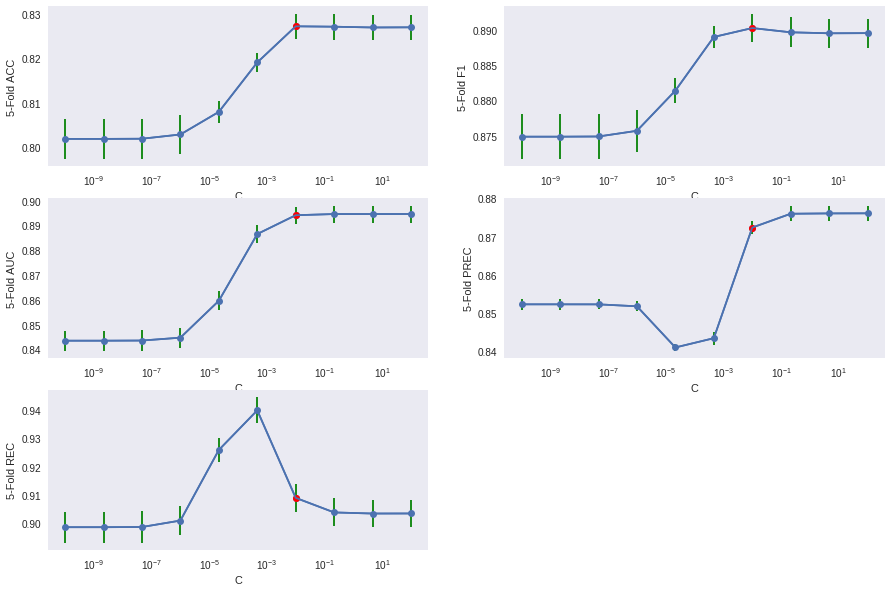

acc (train): 0.8356
acc (test): 0.8248


In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
scores = np.array(grid.cv_results_['mean_test_accuracy']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_accuracy'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.grid()

plt.subplot(3,2,2)
scores = np.array(grid.cv_results_['mean_test_f1']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_f1'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold F1')
plt.grid()

plt.subplot(3,2,3)
scores = np.array(grid.cv_results_['mean_test_roc_auc']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_roc_auc'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold AUC')
plt.grid()

plt.subplot(3,2,4)
scores = np.array(grid.cv_results_['mean_test_precision']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_precision'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold PREC')
plt.grid()

plt.subplot(3,2,5)
scores = np.array(grid.cv_results_['mean_test_recall']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_recall'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold REC')
plt.grid()

plt.show()

print("acc (train): {:.4f}".format(grid.score(Xs_train, y_train)))
print("acc (test): {:.4f}".format(grid.score(Xs_test, y_test)))


In [0]:
from sklearn.linear_model import LogisticRegression
#C_opt = grid.best_params_['C']
lr = LogisticRegression(C=0.01).fit(Xs_train, y_train)
print("acc (train): {:.4f}".format(lr.score(Xs_train, y_train)))
print("acc (test): {:.4f}".format(lr.score(Xs_test, y_test)))
Test_y_hat = lr.predict(Test_dataset_X_norm)
prediction = {'kaggle_id': diabetes_test_tidy['kaggle_id'].astype(np.int64),'diabetic': Test_y_hat}
df = pd.DataFrame(data=prediction)
df.to_csv('regresion_logistica', columns=['kaggle_id', 'diabetic'], index = False)

acc (train): 0.8356
acc (test): 0.8248


In [0]:
from google.colab import files
files.download('regresion_logistica')

In [0]:
from sklearn.linear_model import Lasso
n_alphas = 1
alpha_vector = np.logspace(-6, -2, n_alphas)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(Xs_train, y_train)

In [0]:
grid

NameError: name 'grid' is not defined

In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
scores = -1*np.array(grid.cv_results_['mean_test_score'])
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.semilogx(alpha_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(alpha_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('alpha')
plt.ylabel('5-Fold MSE')
plt.grid()


plt.show()

In [0]:
import math
from sklearn.linear_model import Lasso
#alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = 0.01).fit(Xs_train,y_train)

w = lasso.coef_
names = []
for f,wi in zip(features,w):
   if (math.fabs(wi)> 1e-5):
    print(f,wi)
    names.append(f)


('A1Cresult', 0.01330194799275005)
('age', -0.008619057374600897)
('chlorpropamide', 0.0005990956146598252)
('glimepiride', 0.04383519753495125)
('glipizide', 0.07657377451601653)
('glyburide', 0.06865672537301708)
('glyburide-metformin', 0.012028919038398686)
('metformin', 0.07731381584563911)
('nateglinide', 0.007753995557938457)
('num_medications', 0.052782150171859325)
('num_procedures', -0.00798841856505146)
('number_inpatient', 0.005303444666029713)
('pioglitazone', 0.03939126835556117)
('readmitted', 0.012394701267189927)
('repaglinide', 0.019022613131764326)
('rosiglitazone', 0.033810787821884625)
('weight', -0.009098290812018581)
('race_Caucasian', -0.0003622880422900618)
('admission_type_id_5', 0.002753977438823927)
('admission_type_id_6', -0.0008922303791336929)
('discharge_disposition_id_18', -0.01955891428466165)
('payer_code_HM', -0.010661740686604408)
('payer_code_MD', 0.001962651813287466)
('payer_code_Unknown', -0.014822441146756698)
('medical_specialty_InternalMedicin

In [0]:
import math
columnas_relevantes = []
for wi,i in zip(w, range(w.size)):

    if (math.fabs(wi)> 1e-5):
        columnas_relevantes.append(i)
Xs_red_train = Xs_train[:, columnas_relevantes]
Xs_red_test = Xs_test[:, columnas_relevantes]
Test_red_X = Test_dataset_X_norm[:, columnas_relevantes]
print('Datos train: ', Xs_red_train.shape)
print('Datos test:  ', Xs_red_test.shape)

('Datos train: ', (56968, 31))
('Datos test:  ', (24415, 31))


In [0]:

from sklearn.svm import SVC

svmModel = SVC(kernel='linear', C = 1, verbose = 1).fit(Xs_red_train,y_train)

[LibSVM]

In [0]:
print("acc (train): {:.4f}".format(svmModel.score(Xs_red_train, y_train)))
print("acc (test): {:.4f}".format(svmModel.score(Xs_red_test, y_test)))
Test_y_hat = svmModel.predict(Test_red_X)
prediction = {'kaggle_id': diabetes_test_tidy['kaggle_id'].astype(np.int64),'diabetic': Test_y_hat}
df = pd.DataFrame(data=prediction)
df.to_csv('svm', columns=['kaggle_id', 'diabetic'], index = False)

acc (train): 0.8206
acc (test): 0.8161


In [0]:
svmModel = SVC( C = 1, verbose = 1).fit(Xs_red_train,y_train)

[LibSVM]

In [0]:
print("acc (train): {:.4f}".format(svmModel.score(Xs_red_train, y_train)))
print("acc (test): {:.4f}".format(svmModel.score(Xs_red_test, y_test)))
Test_y_hat = svmModel.predict(Test_red_X)
prediction = {'kaggle_id': diabetes_test_tidy['kaggle_id'].astype(np.int64),'diabetic': Test_y_hat}
df = pd.DataFrame(data=prediction)
df.to_csv('svm', columns=['kaggle_id', 'diabetic'], index = False)

acc (train): 0.8256
acc (test): 0.8206


In [0]:
from google.colab import files
files.download('svm')

In [0]:
from sklearn.linear_model import LogisticRegression
vectorC =  np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(),  scoring= ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], refit='accuracy',  param_grid=param_grid, cv = 5, verbose = 2)
grid.fit(Xs_red_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1e-10 .........................................................
[CV] .......................................... C=1e-10, total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... C=1e-10, total=   0.1s
[CV] C=1e-10 .........................................................
[CV] .......................................... C=1e-10, total=   0.1s
[CV] C=1e-10 .........................................................
[CV] .......................................... C=1e-10, total=   0.1s
[CV] C=1e-10 .........................................................
[CV] .......................................... C=1e-10, total=   0.1s
[CV] C=4.281332398719396e-10 .........................................
[CV] .......................... C=4.281332398719396e-10, total=   0.1s
[CV] C=4.281332398719396e-10 .........................................
[CV] .......................... C=4.281332398719396e-10, total=   0.1s
[CV] C=4.281332398719396e-10 .........................................
[CV] .......................... C=4.281332398719396e-10, total=   0.1s
[CV] C=4.281332398719396e-10 .........................................
[CV] .

[CV] ......................... C=0.00020691380811147902, total=   0.2s
[CV] C=0.00020691380811147902 ........................................
[CV] ......................... C=0.00020691380811147902, total=   0.2s
[CV] C=0.00020691380811147902 ........................................
[CV] ......................... C=0.00020691380811147902, total=   0.2s
[CV] C=0.00020691380811147902 ........................................
[CV] ......................... C=0.00020691380811147902, total=   0.1s
[CV] C=0.00020691380811147902 ........................................
[CV] ......................... C=0.00020691380811147902, total=   0.2s
[CV] C=0.0008858667904100814 .........................................
[CV] .......................... C=0.0008858667904100814, total=   0.2s
[CV] C=0.0008858667904100814 .........................................
[CV] .......................... C=0.0008858667904100814, total=   0.2s
[CV] C=0.0008858667904100814 .........................................
[CV] .

[CV] .............................. C=5.455594781168514, total=   0.4s
[CV] C=5.455594781168514 .............................................
[CV] .............................. C=5.455594781168514, total=   0.4s
[CV] C=5.455594781168514 .............................................
[CV] .............................. C=5.455594781168514, total=   0.4s
[CV] C=23.357214690901213 ............................................
[CV] ............................. C=23.357214690901213, total=   0.4s
[CV] C=23.357214690901213 ............................................
[CV] ............................. C=23.357214690901213, total=   0.5s
[CV] C=23.357214690901213 ............................................
[CV] ............................. C=23.357214690901213, total=   0.5s
[CV] C=23.357214690901213 ............................................
[CV] ............................. C=23.357214690901213, total=   0.5s
[CV] C=23.357214690901213 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-10, 4.28133e-10, 1.83298e-09, 7.84760e-09, 3.35982e-08,
       1.43845e-07, 6.15848e-07, 2.63665e-06, 1.12884e-05, 4.83293e-05,
       2.06914e-04, 8.85867e-04, 3.79269e-03, 1.62378e-02, 6.95193e-02,
       2.97635e-01, 1.27427e+00, 5.45559e+00, 2.33572e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
       verbose=2)

best mean cross-validation score: 0.819
best parameters: {'C': 0.0695192796177559}


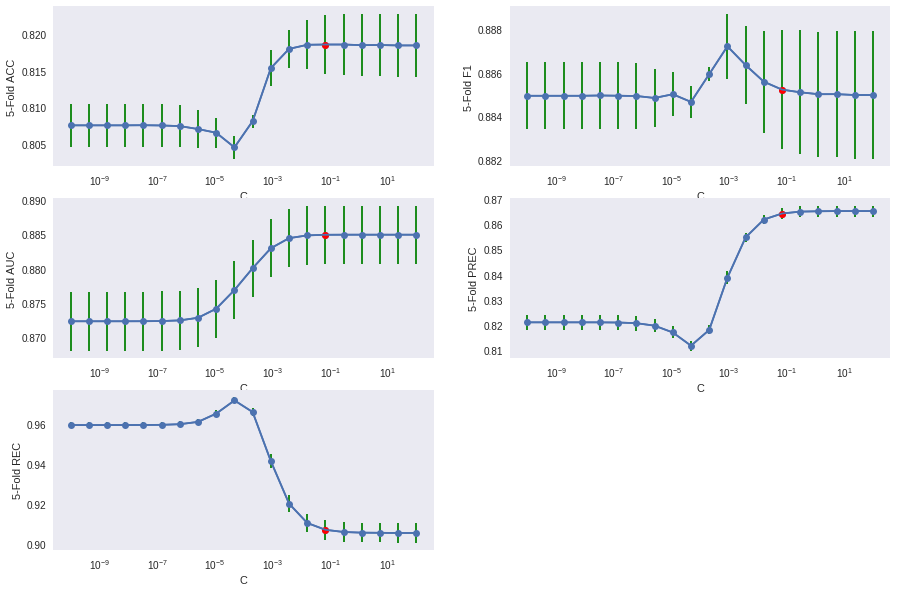

acc (train): 0.8189
acc (test): 0.8121


In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
scores = np.array(grid.cv_results_['mean_test_accuracy']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_accuracy'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_], scores[grid.best_index_], 'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.grid()

plt.subplot(3,2,2)
scores = np.array(grid.cv_results_['mean_test_f1']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_f1'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_], scores[grid.best_index_], 'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold F1')
plt.grid()

plt.subplot(3,2,3)
scores = np.array(grid.cv_results_['mean_test_roc_auc']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_roc_auc'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_], scores[grid.best_index_], 'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold AUC')
plt.grid()

plt.subplot(3,2,4)
scores = np.array(grid.cv_results_['mean_test_precision']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_precision'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_], scores[grid.best_index_], 'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold PREC')
plt.grid()

plt.subplot(3,2,5)
scores = np.array(grid.cv_results_['mean_test_recall']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_recall'])
plt.semilogx(vectorC,scores,'-o')
plt.semilogx(vectorC[grid.best_index_], scores[grid.best_index_], 'ro')
plt.errorbar(vectorC, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold REC')
plt.grid()

plt.show()

print("acc (train): {:.4f}".format(grid.score(Xs_red_train, y_train)))
print("acc (test): {:.4f}".format(grid.score(Xs_red_test, y_test)))

In [0]:
from sklearn.tree import DecisionTreeClassifier

max_depth_vector = np.arange(14, 20, 1)
param_grid = {'max_depth': max_depth_vector }
grid = GridSearchCV(DecisionTreeClassifier(),  scoring= ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], refit='accuracy', param_grid=param_grid, cv = 5,verbose = 1)
grid.fit(Xs_red_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
       verbose=1)

best mean cross-validation score: 0.814
best parameters: {'max_depth': 15}


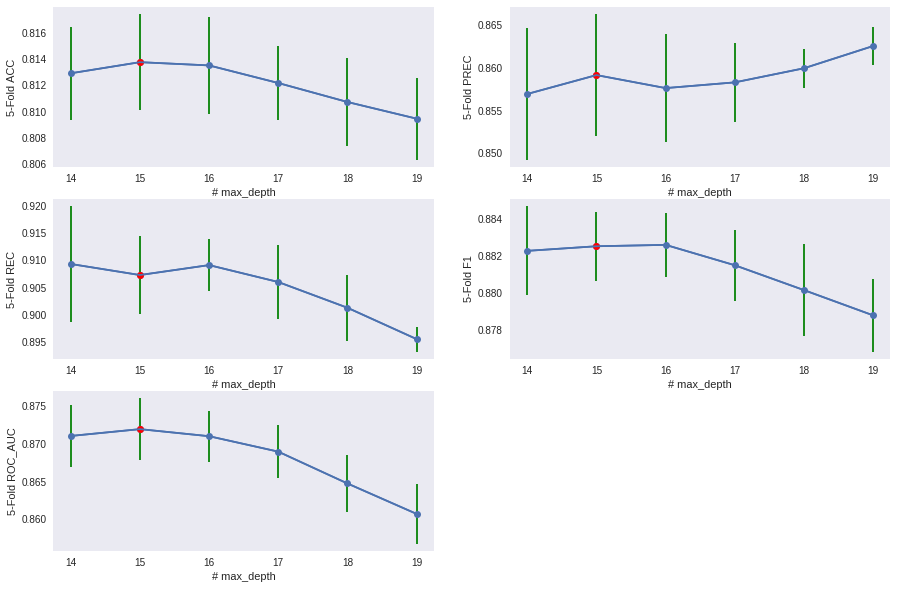

acc (train): 0.8201
acc (test): 0.8079


In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
plt.figure(figsize=[15,10])

plt.subplot(3,2,1)
scores = np.array(grid.cv_results_['mean_test_accuracy']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_accuracy'])

plt.plot(max_depth_vector,scores,'-o')
plt.plot(max_depth_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(max_depth_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold ACC')
plt.grid()

plt.subplot(3,2,2)
scores = np.array(grid.cv_results_['mean_test_precision']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_precision'])

plt.plot(max_depth_vector,scores,'-o')
plt.plot(max_depth_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(max_depth_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold PREC')
plt.grid()

plt.subplot(3,2,3)
scores = np.array(grid.cv_results_['mean_test_recall']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_recall'])

plt.plot(max_depth_vector,scores,'-o')
plt.plot(max_depth_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(max_depth_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold REC')
plt.grid()

plt.subplot(3,2,4)
scores = np.array(grid.cv_results_['mean_test_f1']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_f1'])

plt.plot(max_depth_vector,scores,'-o')
plt.plot(max_depth_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(max_depth_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold F1')
plt.grid()

plt.subplot(3,2,5)
scores = np.array(grid.cv_results_['mean_test_roc_auc']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_roc_auc'])

plt.plot(max_depth_vector,scores,'-o')
plt.plot(max_depth_vector[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(max_depth_vector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold ROC_AUC')
plt.grid()

plt.show()
print("acc (train): {:.4f}".format(grid.score(Xs_red_train, y_train)))
print("acc (test): {:.4f}".format(grid.score(Xs_red_test, y_test)))

In [0]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(6,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'),scoring= ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], refit='accuracy', param_grid=tuned_parameters,cv=5) 
grid.fit(Xs_red_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn',
       scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
       verbose=0)

best mean cross-validation score: 0.821
best parameters: {'max_depth': 19}


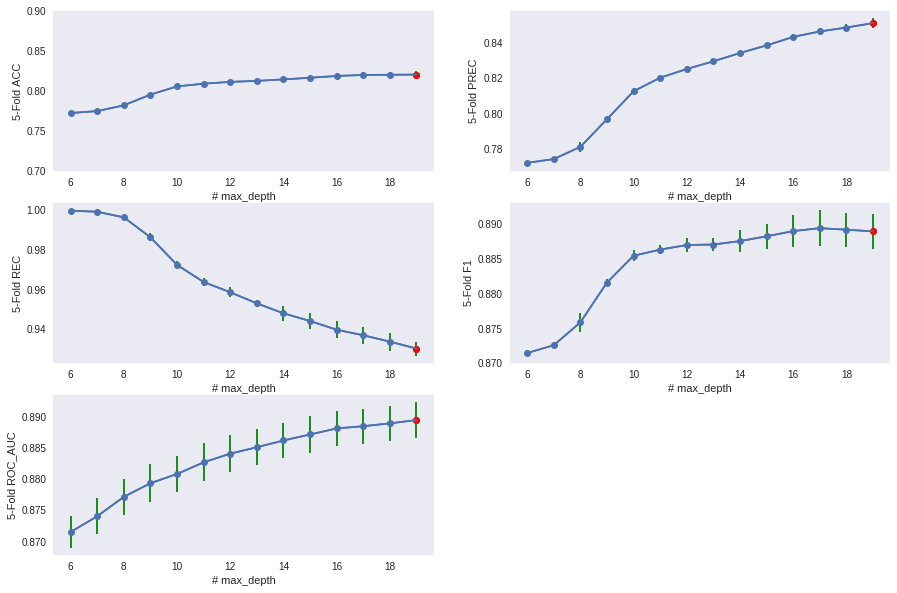

acc (train): 0.8390
acc (test): 0.8174


In [0]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
plt.figure(figsize=[15,10])

plt.subplot(3,2,1)
scores = np.array(grid.cv_results_['mean_test_accuracy']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_accuracy'])

plt.plot(maxDepth,scores,'-o')
plt.plot(maxDepth[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(maxDepth, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold ACC')
plt.ylim([0.7,0.9])
plt.grid()

plt.subplot(3,2,2)
scores = np.array(grid.cv_results_['mean_test_precision']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_precision'])

plt.plot(maxDepth,scores,'-o')
plt.plot(maxDepth[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(maxDepth, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold PREC')
plt.grid()

plt.subplot(3,2,3)
scores = np.array(grid.cv_results_['mean_test_recall']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_recall'])

plt.plot(maxDepth,scores,'-o')
plt.plot(maxDepth[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(maxDepth, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold REC')
plt.grid()

plt.subplot(3,2,4)
scores = np.array(grid.cv_results_['mean_test_f1']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_f1'])

plt.plot(maxDepth,scores,'-o')
plt.plot(maxDepth[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(maxDepth, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold F1')
plt.grid()

plt.subplot(3,2,5)
scores = np.array(grid.cv_results_['mean_test_roc_auc']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_roc_auc'])

plt.plot(maxDepth,scores,'-o')
plt.plot(maxDepth[grid.best_index_],scores[grid.best_index_],'ro')
plt.errorbar(maxDepth, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# max_depth')
plt.ylabel('5-Fold ROC_AUC')
plt.grid()

plt.show()
print("acc (train): {:.4f}".format(grid.score(Xs_red_train, y_train)))
print("acc (test): {:.4f}".format(grid.score(Xs_red_test, y_test)))

In [0]:
Test_y_hat = grid.predict(Test_red_X)
prediction = {'kaggle_id': diabetes_test_tidy['kaggle_id'].astype(np.int64),'diabetic': Test_y_hat}
df = pd.DataFrame(data=prediction)
df.to_csv('random_forest', columns=['kaggle_id', 'diabetic'], index = False)

In [0]:
from google.colab import files
files.download('random_forest')

In [0]:

from sklearn.svm import SVC

# Paso 2:
vectorC = np.logspace(-3, 3, 5)


param_grid = {'C': vectorC}


grid = GridSearchCV(SVC(),scoring= ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'], refit='accuracy', param_grid=param_grid,cv=3, verbose = 1) 
grid.fit(Xs_red_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


#KNN

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

NVecinosIni = 5
NVecinosFin = 10
j = 1
nVecinos = range(NVecinosIni,NVecinosFin,j)

param_grid = {'n_neighbors':  np.arange(NVecinosIni, NVecinosFin, j)}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
#plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid.score(Xs_test, y_test)))